# undergraduate

## Step 1

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
WC = pd.read_excel('/content/drive/MyDrive/Week 1/WorldCupMatches.xlsx')
print(WC.columns.tolist())

['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials']


In [ ]:
WC

In [71]:
WC['hwin'] = np.where(WC['Home Team Goals']>WC['Away Team Goals'],1,0)
WC['awin'] = np.where(WC['Home Team Goals']<WC['Away Team Goals'],1,0)
WC['tie'] = np.where(WC['Home Team Goals']==WC['Away Team Goals'],1,0)
WC['count'] = 1
WC

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,hwin,awin,tie,count
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,1,0,0,1
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,1,0,0,1
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,1,0,0,1
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,1,0,0,1
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),...,RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC,0,0,1,1
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,...,TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER,0,1,0,1
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),...,DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG,0,0,1,1
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,...,ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED,0,1,0,1


In [ ]:
WCh = WC.groupby('Home Team Name')['hwin','Home Team Goals','Away Team Goals','count'].sum().reset_index()
WCh

In [73]:
#WCh = WCh[WCh['count']>5]
WCh = WCh.rename(columns={'Home Team Name':'team'})
WCh = WCh.reset_index(drop=True)
WCh

,team,hwin,Home Team Goals,Away Team Goals,count
0,Algeria,1,5,10,6
1,Angola,0,0,1,1
2,Argentina,41,111,44,54
3,Australia,2,7,11,6
4,Austria,10,31,17,13
...,...,...,...,...,...
73,"rn"">Bosnia and Herzegovina",1,3,1,1
74,"rn"">Republic of Ireland",0,2,2,5
75,"rn"">Serbia and Montenegro",0,0,1,1
76,"rn"">Trinidad and Tobago",0,0,0,1


In [ ]:
WCa = WC.groupby('Away Team Name')['awin','Home Team Goals','Away Team Goals','count'].sum().reset_index()
WCa

In [ ]:
#WCa = WCa[WCa['count']>5].reset_index(drop=True)
WCa = WCa.rename(columns={'Away Team Name':'team'})
WCa

In [76]:
WC = pd.merge(WCh,WCa,on='team')
WC

,team,hwin,Home Team Goals_x,Away Team Goals_x,count_x,awin,Home Team Goals_y,Away Team Goals_y,count_y
0,Algeria,1,5,10,6,2,11,9,8
1,Angola,0,0,1,1,0,1,1,2
2,Argentina,41,111,44,54,3,41,22,27
3,Australia,2,7,11,6,0,15,4,7
4,Austria,10,31,17,13,2,30,12,16
...,...,...,...,...,...,...,...,...,...
73,"rn"">Bosnia and Herzegovina",1,3,1,1,0,3,1,2
74,"rn"">Republic of Ireland",0,2,2,5,2,8,8,8
75,"rn"">Serbia and Montenegro",0,0,1,1,0,9,2,2
76,"rn"">Trinidad and Tobago",0,0,0,1,0,4,0,2


In [ ]:
WC['W'] = WC['hwin']+WC['awin']
WC['G'] = WC['count_x']+WC['count_y']
WC['R'] = WC['Home Team Goals_x']+WC['Away Team Goals_y']
WC['RA'] = WC['Home Team Goals_y']+WC['Away Team Goals_x']
WC

In [78]:
WC = WC[WC['G']>10].reset_index(drop=True)
WC

,team,hwin,Home Team Goals_x,Away Team Goals_x,count_x,awin,Home Team Goals_y,Away Team Goals_y,count_y,W,G,R,RA
0,Algeria,1,5,10,6,2,11,9,8,3,14,14,21
1,Argentina,41,111,44,54,3,41,22,27,44,81,133,85
2,Australia,2,7,11,6,0,15,4,7,2,13,11,26
3,Austria,10,31,17,13,2,30,12,16,12,29,43,47
4,Belgium,11,27,16,18,4,52,27,25,15,43,54,68
5,Brazil,59,180,78,82,12,36,45,26,71,108,225,114
6,Bulgaria,2,11,10,7,1,43,11,19,3,26,22,53
7,Cameroon,3,11,23,11,1,20,7,12,4,23,18,43
8,Chile,9,25,11,14,2,39,16,20,11,34,41,50
9,Colombia,5,11,6,7,3,23,18,13,8,20,29,29


In [79]:
WC['WPC'] = WC['W']/WC['G']
WC['PE'] = WC['R']**2/(WC['R']**2+WC['RA']**2)
WC = WC.drop(44)
WC

,team,hwin,Home Team Goals_x,Away Team Goals_x,count_x,awin,Home Team Goals_y,Away Team Goals_y,count_y,W,G,R,RA,WPC,PE
0,Algeria,1,5,10,6,2,11,9,8,3,14,14,21,0.214286,0.307692
1,Argentina,41,111,44,54,3,41,22,27,44,81,133,85,0.543210,0.710002
2,Australia,2,7,11,6,0,15,4,7,2,13,11,26,0.153846,0.151819
3,Austria,10,31,17,13,2,30,12,16,12,29,43,47,0.413793,0.455643
4,Belgium,11,27,16,18,4,52,27,25,15,43,54,68,0.348837,0.386737
5,Brazil,59,180,78,82,12,36,45,26,71,108,225,114,0.657407,0.795728
6,Bulgaria,2,11,10,7,1,43,11,19,3,26,22,53,0.115385,0.146978
7,Cameroon,3,11,23,11,1,20,7,12,4,23,18,43,0.173913,0.149103
8,Chile,9,25,11,14,2,39,16,20,11,34,41,50,0.323529,0.402057
9,Colombia,5,11,6,7,3,23,18,13,8,20,29,29,0.400000,0.500000


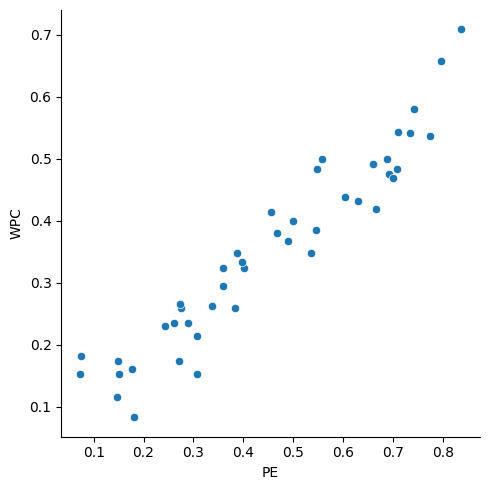

In [80]:
sns.relplot(x='PE',y='WPC',data=WC)

In [81]:
PE_wpc = smf.ols(formula='WPC ~ PE',data=WC).fit()
PE_wpc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WPC   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     416.2
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           2.06e-23
Time:                        07:56:27   Log-Likelihood:                 73.253
No. Observations:                  44   AIC:                            -142.5
Df Residuals:                      42   BIC:                            -138.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0490      0.016      2.976      0.005       0.016       0.082
PE             0.6720      0.033     20.401      0.000       0.606       0.738
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.336
Skew:                           0.003   Prob(JB):                        0.845
Kurtosis:                       2.572   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
from google.colab import files
WC.to_excel('World Cup analysis.xlsx')
files.download('World Cup analysis.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>